In [64]:
import pandas as pd

churn = pd.read_csv("Data/customer_churn.csv")
orders = pd.read_csv("Data/orders.csv")
details = pd.read_csv("Data/details.csv")

In [65]:
churn.shape

(900, 10)

In [66]:
churn.columns.tolist()

['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']

In [67]:
churn.dtypes

Names               object
Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object

In [68]:
churn.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [69]:
churn.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [70]:
churn.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [71]:
churn["Churn"].value_counts()

Churn
0    750
1    150
Name: count, dtype: int64

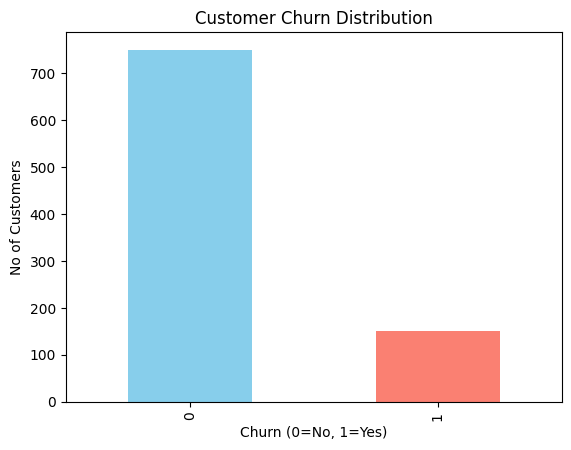

In [72]:
import matplotlib.pyplot as plt

churn['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("No of Customers")
plt.show()

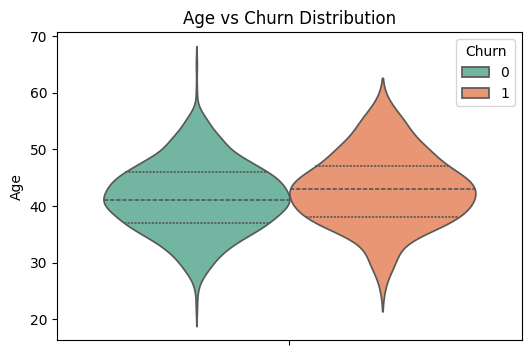

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

#Age vs Churn
plt.figure(figsize=(6,4))
sns.violinplot(hue="Churn", y="Age", data=churn, palette="Set2", inner="quartile")
plt.title("Age vs Churn Distribution")
plt.show()

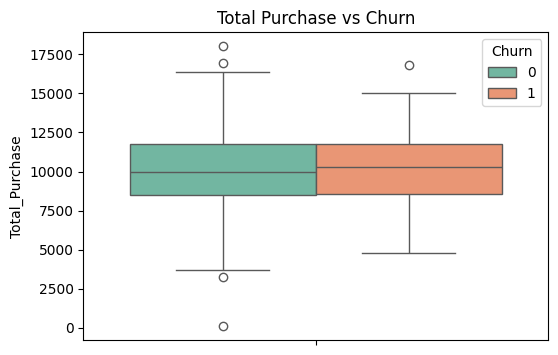

In [74]:
#Total_Purchase vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(hue='Churn', y='Total_Purchase', data=churn, palette="Set2")
plt.title("Total Purchase vs Churn")
plt.show()

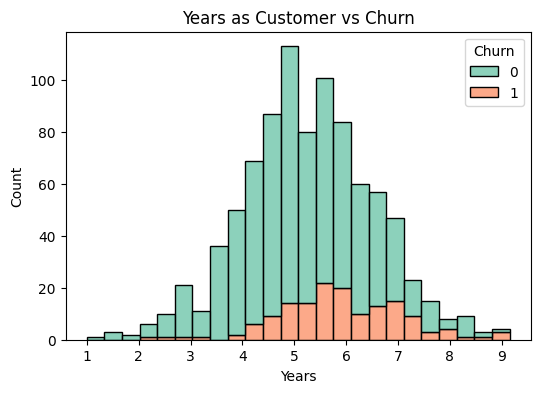

In [75]:
#Years vs Churn
plt.figure(figsize=(6,4))
sns.histplot(data=churn, x="Years", hue="Churn", multiple="stack", kde=False, palette="Set2")
plt.title("Years as Customer vs Churn")
plt.show()

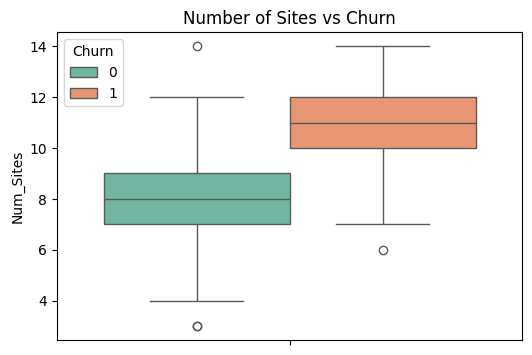

In [76]:
#Num_Sites vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(hue="Churn", y="Num_Sites", data=churn, palette="Set2")
plt.title("Number of Sites vs Churn")
plt.show()

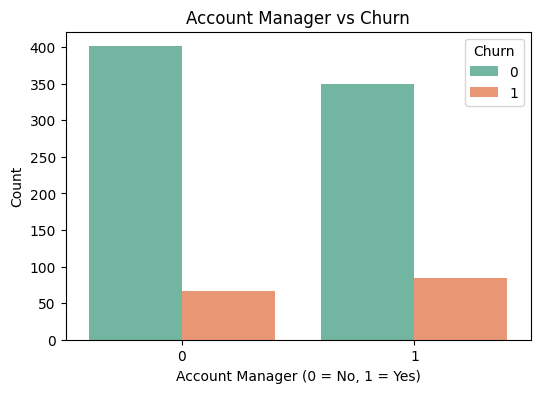

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(x="Account_Manager", hue="Churn", data=churn, palette="Set2")
plt.title("Account Manager vs Churn")
plt.xlabel("Account Manager (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

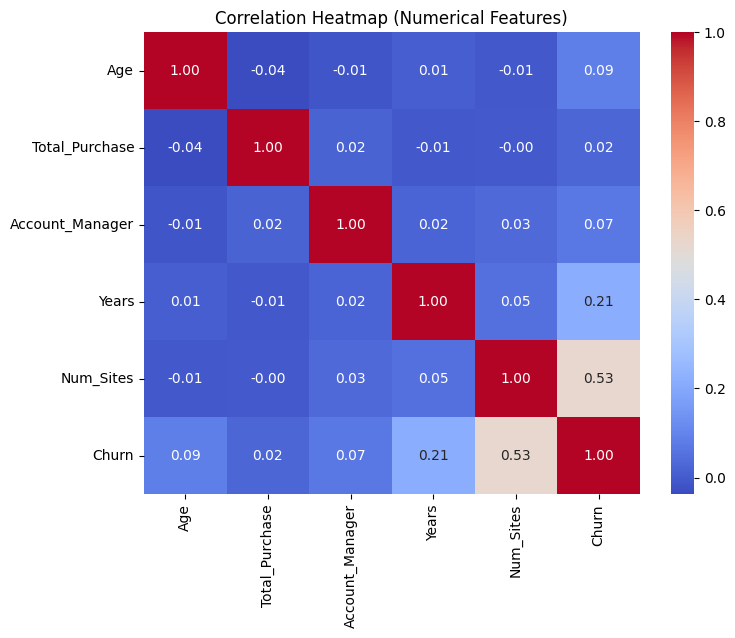

In [78]:
num_cols = ['Age','Total_Purchase','Account_Manager','Years','Num_Sites','Churn']

plt.figure(figsize=(8,6))
sns.heatmap(churn[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

Merging Extra Datasets

In [79]:
# Check the structure of each dataset
print("Customer Churn Data:")
churn.info()
churn.head()

Customer Churn Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [80]:
print("Orders Data: ")
orders.info()
orders.head()

Orders Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [81]:
print("Details Data:")
details.info()
details.head()

Details Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [87]:
orders_details = pd.merge(orders, details, on='Order ID', how='inner')
orders_details.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD


In [88]:
orders_details.shape

(1500, 11)

In [89]:
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Order Date    1500 non-null   object
 2   CustomerName  1500 non-null   object
 3   State         1500 non-null   object
 4   City          1500 non-null   object
 5   Amount        1500 non-null   int64 
 6   Profit        1500 non-null   int64 
 7   Quantity      1500 non-null   int64 
 8   Category      1500 non-null   object
 9   Sub-Category  1500 non-null   object
 10  PaymentMode   1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 129.0+ KB


In [90]:
orders_details.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

In [91]:
orders_details.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


In [96]:
orders_details['State'].unique()[:10] # first 10 states

array(['Uttar Pradesh', 'Delhi', 'Maharashtra', 'Madhya Pradesh',
       'Andhra Pradesh', 'Gujarat', 'Bihar', 'Himachal Pradesh', 'Punjab',
       'Kerala '], dtype=object)

In [95]:
orders_details['Category'].unique()

array(['Furniture', 'Electronics', 'Clothing'], dtype=object)

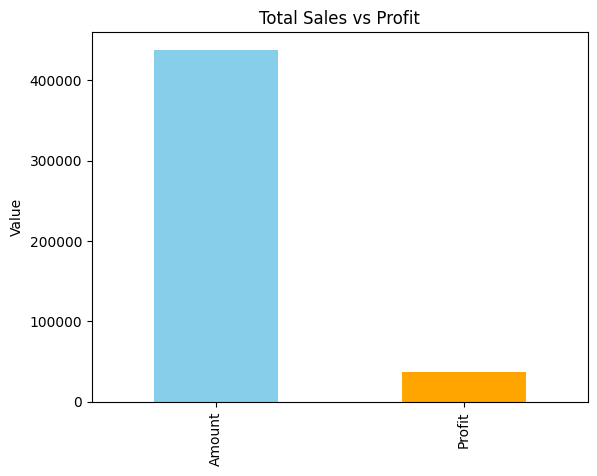

In [98]:
#Total Sales and Profit
orders_details[['Amount','Profit']].sum().plot(kind='bar', color=['skyblue','orange'])
plt.title("Total Sales vs Profit")
plt.ylabel("Value")
plt.show()

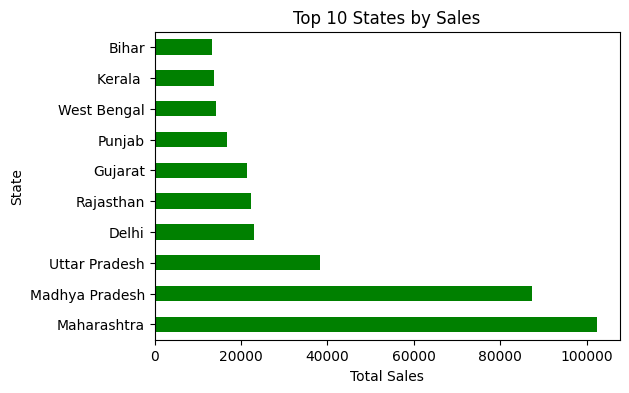

In [114]:
# Top 10 States by Sales

plt.figure(figsize=(6, 4))
state_sales = orders_details.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='barh', color='green')

plt.title("Top 10 States by Sales")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.show()

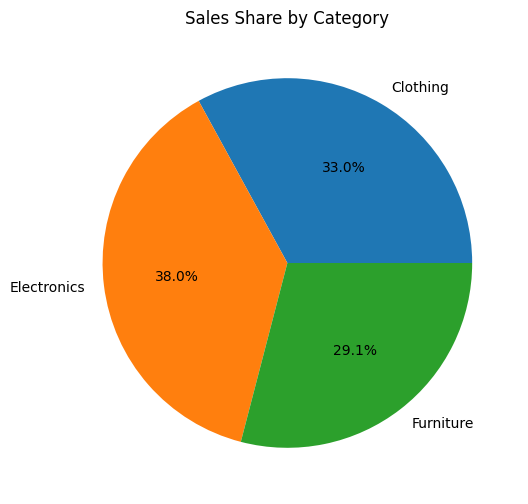

In [121]:
#Sales by Category
cat_sales = orders_details.groupby('Category')['Amount'].sum()
cat_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Sales Share by Category")
plt.ylabel("")
plt.show()

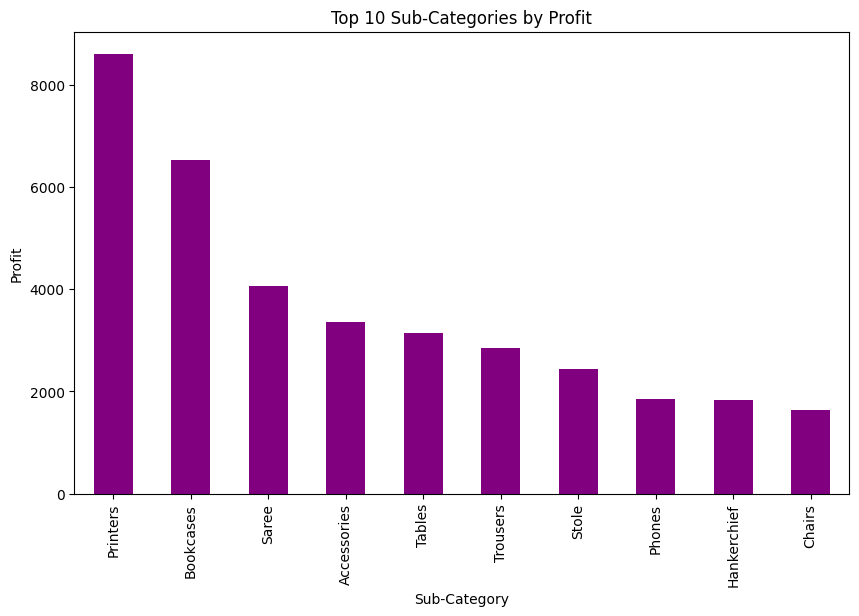

In [124]:
#Top 10 Sub-Categories by Profit
subcat_profit = orders_details.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
subcat_profit.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Top 10 Sub-Categories by Profit")
plt.ylabel("Profit")
plt.show()

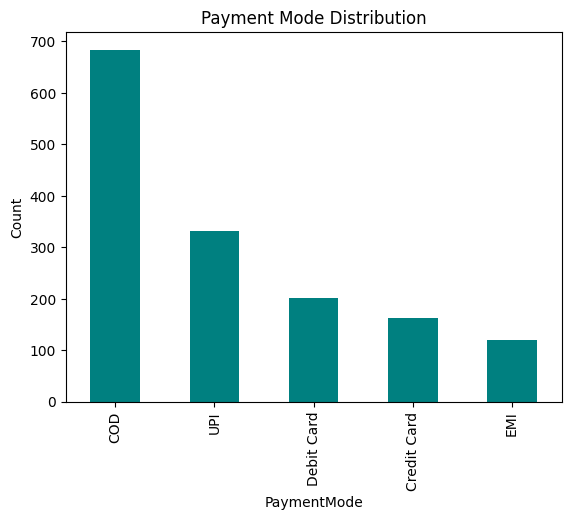

In [126]:
#Payment Mode Distribution
orders_details['PaymentMode'].value_counts().plot(kind='bar', color='teal')
plt.title("Payment Mode Distribution")
plt.ylabel("Count")
plt.show()